# Test 8
This test circuit shown in @fig-test_8 is the same circuit as @fig-test_7, for the addition of two Op Amps.

$\large{\color {red} {\text{make a spread sheet an find the differences at s=1}}}$  

![test circuit](test_8.png){#fig-test_8}

The netlist generated by LTSpice:
```
* test_8.asc
R1 16 8 5
R2 8 1 2
R6 2 0 5
R8 11 10 8
R10 23 22 9
R11 9 8 4
R12 2 1 2
R14 10 9 10
R15 24 23 5
V1 22 0 AC 10
V2 1 0 2
V3 10 3 3
V4 10 20 5
I1 5 0 3
I2 2 3 1
I3 16 9 2
I4 12 18 2
R7 12 5 10
R16 3 0 6
R3 26 25 10
R4 4 3 3
F1 14 7 V2 2
E1 15 21 2 7 2
H1 4 0 V2 3
G1 11 4 13 12 2
L1 16 23 1 Rser=0
L2 25 9 4 Rser=0
V5 20 28 0
V6 23 27 0
L3 22 21 2 Rser=0
L4 17 11 5 Rser=0
C1 23 18 2
C2 12 11 2
L5 0 7 1 Rser=0
L6 9 2 2 Rser=0
F2 0 27 V2 2
E2 17 26 10 9 2
H2 27 26 V2 3
G2 16 28 0 5 2
V7 24 25 0
V8 0 6 0
R9 22 16 3
R13 15 0 5
R17 19 13 5
R18 13 6 2
R19 23 19 7
R20 20 19 5
R21 19 18 3
R22 14 13 3
R23 5 4 1
R24 20 14 3
R25 23 28 10
R5 28 0 3
R26 32 31 20k
R27 30 29 10k
R28 13 30 2
R29 24 32 5
R30 29 21 20k
R31 31 8 10k
XU1 29 0 30 opamp Aol=100K GBW=10Meg
XU2 31 0 32 opamp Aol=100K GBW=10Meg
.op
K1 L1 L2 0.8
K2 L3 L4 0.2
* ;.ac list 0.159154943
.lib opamp.sub
* ;.ac dec 100 0.01 10
.backanno
.end
```

In [1]:
#import os
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Load the net list

In [2]:
net_list = '''
R1 16 8 5
R2 8 1 2
R6 2 0 5
R8 11 10 8
R10 23 22 9
R11 9 8 4
R12 2 1 2
R14 10 9 10
R15 24 23 5
V1 22 0 10
V2 1 0 2
V3 10 3 3
V4 10 20 5
I1 5 0 3
I2 2 3 1
I3 16 9 2
I4 12 18 2
R7 12 5 10
R16 3 0 6
R3 26 25 10
R4 4 3 3
F1 14 7 V2 2
E1 15 21 2 7 2
H1 4 0 V2 3
G1 11 4 13 12 2
L1 16 23 1 
L2 25 9 4 
V5 20 28 0
V6 23 27 0
L3 22 21 2 
L4 17 11 5 
C1 23 18 2
C2 12 11 2
L5 0 7 1 
L6 9 2 2 
F2 0 27 V2 2
E2 17 26 10 9 2
H2 27 26 V2 3
G2 16 28 0 5 2
V7 24 25 0
V8 0 6 0
R9 22 16 3
R13 15 0 5
R17 19 13 5
R18 13 6 2
R19 23 19 7
R20 20 19 5
R21 19 18 3
R22 14 13 3
R23 5 4 1
R24 20 14 3
R25 23 28 10
R5 28 0 3
R26 32 31 20e3
R27 30 29 10e3
R28 13 30 2
R29 24 32 5
R30 29 21 20e3
R31 31 8 10e3
O1 29 0 30 
O2 31 0 32 
K1 L1 L2 0.8
K2 L3 L4 0.2
'''

## Call the symbolic modified nodal analysis function

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

Display the equations

In [4]:
# reform X and Z into Matrix type for printing
Xp = Matrix(X)
Zp = Matrix(Z)
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*Xp)[i:i+1][0],Zp[i])))

Markdown(temp)

$I_{V2} + v_{1} \cdot \left(\frac{1}{R_{2}} + \frac{1}{R_{12}}\right) - \frac{v_{8}}{R_{2}} - \frac{v_{2}}{R_{12}} = 0$<br>$- I_{L6} + v_{2} \cdot \left(\frac{1}{R_{6}} + \frac{1}{R_{12}}\right) - \frac{v_{1}}{R_{12}} = - I_{2}$<br>$- I_{V3} + v_{3} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{16}}\right) - \frac{v_{4}}{R_{4}} = I_{2}$<br>$I_{H1} + g_{1} v_{12} - g_{1} v_{13} + v_{4} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{23}}\right) - \frac{v_{3}}{R_{4}} - \frac{v_{5}}{R_{23}} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{7}} + \frac{1}{R_{23}}\right) - \frac{v_{12}}{R_{7}} - \frac{v_{4}}{R_{23}} = - I_{1}$<br>$- I_{V8} - \frac{v_{13}}{R_{18}} + \frac{v_{6}}{R_{18}} = 0$<br>$- I_{F1} - I_{L5} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{31}} + \frac{1}{R_{2}} + \frac{1}{R_{11}} + \frac{1}{R_{1}}\right) - \frac{v_{31}}{R_{31}} - \frac{v_{1}}{R_{2}} - \frac{v_{9}}{R_{11}} - \frac{v_{16}}{R_{1}} = 0$<br>$- I_{L2} + I_{L6} + v_{9} \cdot \left(\frac{1}{R_{14}} + \frac{1}{R_{11}}\right) - \frac{v_{10}}{R_{14}} - \frac{v_{8}}{R_{11}} = I_{3}$<br>$I_{V3} + I_{V4} + v_{10} \cdot \left(\frac{1}{R_{8}} + \frac{1}{R_{14}}\right) - \frac{v_{11}}{R_{8}} - \frac{v_{9}}{R_{14}} = 0$<br>$- I_{L4} + g_{1} v_{13} + v_{11} \left(C_{2} s + \frac{1}{R_{8}}\right) + v_{12} \left(- C_{2} s - g_{1}\right) - \frac{v_{10}}{R_{8}} = 0$<br>$- C_{2} s v_{11} + v_{12} \left(C_{2} s + \frac{1}{R_{7}}\right) - \frac{v_{5}}{R_{7}} = - I_{4}$<br>$v_{13} \cdot \left(\frac{1}{R_{28}} + \frac{1}{R_{22}} + \frac{1}{R_{18}} + \frac{1}{R_{17}}\right) - \frac{v_{30}}{R_{28}} - \frac{v_{14}}{R_{22}} - \frac{v_{6}}{R_{18}} - \frac{v_{19}}{R_{17}} = 0$<br>$I_{F1} + v_{14} \cdot \left(\frac{1}{R_{24}} + \frac{1}{R_{22}}\right) - \frac{v_{20}}{R_{24}} - \frac{v_{13}}{R_{22}} = 0$<br>$I_{Ea1} + \frac{v_{15}}{R_{13}} = 0$<br>$I_{L1} - g_{2} v_{5} + v_{16} \cdot \left(\frac{1}{R_{9}} + \frac{1}{R_{1}}\right) - \frac{v_{22}}{R_{9}} - \frac{v_{8}}{R_{1}} = - I_{3}$<br>$I_{Ea2} + I_{L4} = 0$<br>$- C_{1} s v_{23} + v_{18} \left(C_{1} s + \frac{1}{R_{21}}\right) - \frac{v_{19}}{R_{21}} = I_{4}$<br>$v_{19} \cdot \left(\frac{1}{R_{21}} + \frac{1}{R_{20}} + \frac{1}{R_{19}} + \frac{1}{R_{17}}\right) - \frac{v_{18}}{R_{21}} - \frac{v_{20}}{R_{20}} - \frac{v_{23}}{R_{19}} - \frac{v_{13}}{R_{17}} = 0$<br>$- I_{V4} + I_{V5} + v_{20} \cdot \left(\frac{1}{R_{24}} + \frac{1}{R_{20}}\right) - \frac{v_{14}}{R_{24}} - \frac{v_{19}}{R_{20}} = 0$<br>$- I_{Ea1} - I_{L3} + \frac{v_{21}}{R_{30}} - \frac{v_{29}}{R_{30}} = 0$<br>$I_{L3} + I_{V1} + v_{22} \cdot \left(\frac{1}{R_{9}} + \frac{1}{R_{10}}\right) - \frac{v_{16}}{R_{9}} - \frac{v_{23}}{R_{10}} = 0$<br>$- C_{1} s v_{18} - I_{L1} + I_{V6} + v_{23} \left(C_{1} s + \frac{1}{R_{25}} + \frac{1}{R_{19}} + \frac{1}{R_{15}} + \frac{1}{R_{10}}\right) - \frac{v_{28}}{R_{25}} - \frac{v_{19}}{R_{19}} - \frac{v_{24}}{R_{15}} - \frac{v_{22}}{R_{10}} = 0$<br>$I_{V7} + v_{24} \cdot \left(\frac{1}{R_{29}} + \frac{1}{R_{15}}\right) - \frac{v_{32}}{R_{29}} - \frac{v_{23}}{R_{15}} = 0$<br>$I_{L2} - I_{V7} + \frac{v_{25}}{R_{3}} - \frac{v_{26}}{R_{3}} = 0$<br>$- I_{Ea2} - I_{H2} - \frac{v_{25}}{R_{3}} + \frac{v_{26}}{R_{3}} = 0$<br>$- I_{F2} + I_{H2} - I_{V6} = 0$<br>$- I_{V5} + g_{2} v_{5} + v_{28} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{25}}\right) - \frac{v_{23}}{R_{25}} = 0$<br>$v_{29} \cdot \left(\frac{1}{R_{30}} + \frac{1}{R_{27}}\right) - \frac{v_{21}}{R_{30}} - \frac{v_{30}}{R_{27}} = 0$<br>$I_{O1} + v_{30} \cdot \left(\frac{1}{R_{28}} + \frac{1}{R_{27}}\right) - \frac{v_{13}}{R_{28}} - \frac{v_{29}}{R_{27}} = 0$<br>$v_{31} \cdot \left(\frac{1}{R_{31}} + \frac{1}{R_{26}}\right) - \frac{v_{8}}{R_{31}} - \frac{v_{32}}{R_{26}} = 0$<br>$I_{O2} + v_{32} \cdot \left(\frac{1}{R_{29}} + \frac{1}{R_{26}}\right) - \frac{v_{24}}{R_{29}} - \frac{v_{31}}{R_{26}} = 0$<br>$v_{22} = V_{1}$<br>$v_{1} = V_{2}$<br>$v_{10} - v_{3} = V_{3}$<br>$v_{10} - v_{20} = V_{4}$<br>$v_{20} - v_{28} = V_{5}$<br>$v_{23} - v_{27} = V_{6}$<br>$v_{24} - v_{25} = V_{7}$<br>$- v_{6} = V_{8}$<br>$I_{F1} - I_{V2} f_{1} = 0$<br>$- ea_{1} v_{2} + ea_{1} v_{7} + v_{15} - v_{21} = 0$<br>$- I_{V2} h_{1} + v_{4} = 0$<br>$- I_{L1} L_{1} s - I_{L2} M_{1} s + v_{16} - v_{23} = 0$<br>$- I_{L1} M_{1} s - I_{L2} L_{2} s + v_{25} - v_{9} = 0$<br>$- I_{L3} L_{3} s - I_{L4} M_{2} s - v_{21} + v_{22} = 0$<br>$- I_{L3} M_{2} s - I_{L4} L_{4} s - v_{11} + v_{17} = 0$<br>$- I_{L5} L_{5} s - v_{7} = 0$<br>$- I_{L6} L_{6} s - v_{2} + v_{9} = 0$<br>$I_{F2} - I_{V2} f_{2} = 0$<br>$- ea_{2} v_{10} + ea_{2} v_{9} + v_{17} - v_{26} = 0$<br>$- I_{V2} h_{2} - v_{26} + v_{27} = 0$<br>$v_{29} = 0$<br>$v_{31} = 0$<br>

### Netlist statistics

In [5]:
print(report)

Net list report
number of lines in netlist: 63
number of branches: 59
number of nodes: 32
number of unknown currents: 22
number of RLC (passive components): 39
number of inductors: 6
number of independent voltage sources: 8
number of independent current sources: 4
number of op amps: 2
number of E - VCVS: 2
number of G - VCCS: 2
number of F - CCCS: 2
number of H - CCVS: 2
number of K - Coupled inductors: 2



### Connectivity Matrix

In [6]:
A

⎡1     1     -1                                                      -1       
⎢── + ───    ───        0         0         0       0    0           ───      
⎢R₂   R₁₂    R₁₂                                                      R₂      
⎢                                                                             
⎢  -1      1     1                                                            
⎢  ───     ── + ───     0         0         0       0    0            0       
⎢  R₁₂     R₆   R₁₂                                                           
⎢                                                                             
⎢                    1     1     -1                                           
⎢   0         0      ── + ───    ───        0       0    0            0       
⎢                    R₄   R₁₆     R₄                                          
⎢                                                                             
⎢                      -1      1     1     -1       

### Unknown voltages and currents

In [7]:
X

### Known voltages and currents

In [8]:
Z

### Network dataframe

In [9]:
network_df

,element,p node,n node,cp node,cn node,Vout,value,Vname,Lname1,Lname2
0,V1,22,0,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,V2,1,0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,V3,10,3,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,V4,10,20,NaN,NaN,NaN,5.0,NaN,NaN,NaN
4,V5,20,28,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
58,R31,31,8,NaN,NaN,NaN,10000.0,NaN,NaN,NaN
59,O1,29,0,NaN,NaN,30,NaN,NaN,NaN,NaN
60,O2,31,0,NaN,NaN,32,NaN,NaN,NaN,NaN
61,K1,NaN,NaN,NaN,NaN,NaN,0.8,NaN,L1,L2


### Unknown current dataframe

In [10]:
i_unk_df

,element,p node,n node
0,V1,22,0
1,V2,1,0
2,V3,10,3
3,V4,10,20
4,V5,20,28
5,V6,23,27
6,V7,24,25
7,V8,0,6
8,F1,14,7
9,Ea1,15,21


### Build the network equation matrix

In [11]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)
NE_sym

⎡                                    ⎛1     1 ⎞   v₈    v₂                    
⎢                          I_V2 + v₁⋅⎜── + ───⎟ - ── - ───                    
⎢                                    ⎝R₂   R₁₂⎠   R₂   R₁₂                    
⎢                                                                             
⎢                                       ⎛1     1 ⎞    v₁                      
⎢                            -I_L6 + v₂⋅⎜── + ───⎟ - ───                      
⎢                                       ⎝R₆   R₁₂⎠   R₁₂                      
⎢                                                                             
⎢                                        ⎛1     1 ⎞   v₄                      
⎢                             -I_V3 + v₃⋅⎜── + ───⎟ - ──                      
⎢                                        ⎝R₄   R₁₆⎠   R₄                      
⎢                                                                             
⎢                                             ⎛1    

In [12]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

## Symbolic solution

In [13]:
#U_sym = solve(NE_sym,X)

Display the symbolic solution

In [14]:
#temp = ''
#for i in U_sym.keys():
#    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

#Markdown(temp)

## Construct a dictionary of element values

In [15]:
element_value_keys = []
element_value_values = []

for i in range(len(network_df)):
    if network_df.iloc[i]['element'][0] == 'F' or network_df.iloc[i]['element'][0] == 'E' or network_df.iloc[i]['element'][0] == 'G' or network_df.iloc[i]['element'][0] == 'H':
        element_value_keys.append(var(network_df.iloc[i]['element'].lower()))
        element_value_values.append(network_df.iloc[i]['value'])
    else:
        element_value_keys.append(var(network_df.iloc[i]['element']))
        element_value_values.append(network_df.iloc[i]['value'])

element_values = dict(zip(element_value_keys, element_value_values))

### Mutual inductance
In the netlist, the line below specifies that L3 and L4 are connected by a magnetic circuit.
>K1 L1 L2 0.8  
K2 L3 L4 0.2   

K1 identifies the mutual inductance between in two inductors, L3 and L4. k is the coefficient of coupling. 

A coupled inductor has two or more windings that are connected by a magnetic circuit. Coupled inductors transfer energy from one winding to a different winding usually through a commonly used core. The efficiency of the magnetic coupling between both the windings is defined by the coupling factor k or by mutual inductance.

The coupling constant and the [mutual inductance](https://en.wikipedia.org/wiki/Inductance#Mutual_inductance) are related by the equation:

$k = \frac {M}{\sqrt{L_1 \times L_2}}$

Where k is the coupling coefficient and in spice the value of k can be from -1 to +1 to account for a a negative phase relation. Phase dots are drawn on the schematic to indicate the relative direction of the windings. In LTspice the phase dots are associated with the negative terminal of the winding. 

In [16]:
# calculate the coupling constant from the mutual inductance
element_values[M1] = element_values[K1]*np.sqrt(element_values[L1] *element_values[L2])
print('mutual inductance, M1 = {:.9f}'.format(element_values[M1]))

element_values[M2] = element_values[K2]*np.sqrt(element_values[L3] *element_values[L4])
print('mutual inductance, M2 = {:.9f}'.format(element_values[M2]))

mutual inductance, M1 = 1.600000000
mutual inductance, M2 = 0.632455532


In [17]:
element_values

{C₁: 2.0, C₂: 2.0, I₁: 3.0, I₂: 1.0, I₃: 2.0, I₄: 2.0, K₁: 0.8, K₂: 0.2, L₁: 1
.0, L₂: 4.0, L₃: 2.0, L₄: 5.0, L₅: 1.0, L₆: 2.0, M₁: 1.6, M₂: 0.63245553203367
6, O₁: nan, O₂: nan, R₁: 5.0, R₁₀: 9.0, R₁₁: 4.0, R₁₂: 2.0, R₁₃: 5.0, R₁₄: 10.
0, R₁₅: 5.0, R₁₆: 6.0, R₁₇: 5.0, R₁₈: 2.0, R₁₉: 7.0, R₂: 2.0, R₂₀: 5.0, R₂₁: 3
.0, R₂₂: 3.0, R₂₃: 1.0, R₂₄: 3.0, R₂₅: 10.0, R₂₆: 20000.0, R₂₇: 10000.0, R₂₈: 
2.0, R₂₉: 5.0, R₃: 10.0, R₃₀: 20000.0, R₃₁: 10000.0, R₄: 3.0, R₅: 3.0, R₆: 5.0
, R₇: 10.0, R₈: 8.0, R₉: 3.0, V₁: 10.0, V₂: 2.0, V₃: 3.0, V₄: 5.0, V₅: 0.0, V₆
: 0.0, V₇: 0.0, V₈: 0.0, ea₁: 2.0, ea₂: 2.0, f₁: 2.0, f₂: 2.0, g₁: 2.0, g₂: 2.
0, h₁: 3.0, h₂: 3.0}

## DC operating point
Both ?



V4 and I2 are active.

In [18]:
NE = NE_sym.subs(element_values)
NE_dc = NE.subs({s:0})
NE_dc

⎡                                    I_V2 + 1.0⋅v₁ - 0.5⋅v₂ - 0.5⋅v₈          
⎢                                                                             
⎢                                        -I_L6 - 0.5⋅v₁ + 0.7⋅v₂              
⎢                                                                             
⎢                                 -I_V3 + 0.5⋅v₃ - 0.333333333333333⋅v₄       
⎢                                                                             
⎢               I_H1 + 2.0⋅v₁₂ - 2.0⋅v₁₃ - 0.333333333333333⋅v₃ + 1.3333333333
⎢                                                                             
⎢                                         -0.1⋅v₁₂ - v₄ + 1.1⋅v₅              
⎢                                                                             
⎢                                        -I_V8 - 0.5⋅v₁₃ + 0.5⋅v₆             
⎢                                                                             
⎢                                              -I_F1

In [19]:
U_dc = solve(NE_dc,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [20]:
table_header = ['unknown', 'mag']
table_row = []

for name, value in U_dc.items():
    table_row.append([str(name),float(value)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal'),tablefmt="simple",floatfmt=('5s','.6f')))

unknown           mag
---------  ----------
v1           2.000000
v2           5.487985
v3         -13.447794
v4          17.339762
v5          12.339762
v6           0.000000
v7           0.000000
v8          10.071856
v9           5.487985
v10        -10.447794
v11        -13.224949
v12         -7.660238
v13         -7.240585
v14        -28.683952
v15         20.975971
v16         35.986371
v17        -13.224949
v18         10.795432
v19          4.795432
v20        -15.447794
v21         10.000000
v22         10.000000
v23         35.986371
v24          5.487985
v25          5.487985
v26         18.646609
v27         35.986371
v28        -15.447794
v29          0.000000
v30         -5.000000
v31          0.000000
v32        -20.143712
I_V1         7.353804
I_V2         5.779921
I_V3       -13.503818
I_V4        14.750251
I_V5        14.386843
I_V6        -9.751819
I_V7         0.973338
I_V8         3.620293
I_F1        11.559841
I_Ea1       -4.195194
I_H1       -14.423214
I_L1      

In [21]:
for name, value in U_dc.items():
    print('{:s}, {:f}'.format(str(name),float(value)))

v1, 2.000000
v2, 5.487985
v3, -13.447794
v4, 17.339762
v5, 12.339762
v6, 0.000000
v7, 0.000000
v8, 10.071856
v9, 5.487985
v10, -10.447794
v11, -13.224949
v12, -7.660238
v13, -7.240585
v14, -28.683952
v15, 20.975971
v16, 35.986371
v17, -13.224949
v18, 10.795432
v19, 4.795432
v20, -15.447794
v21, 10.000000
v22, 10.000000
v23, 35.986371
v24, 5.487985
v25, 5.487985
v26, 18.646609
v27, 35.986371
v28, -15.447794
v29, 0.000000
v30, -5.000000
v31, 0.000000
v32, -20.143712
I_V1, 7.353804
I_V2, 5.779921
I_V3, -13.503818
I_V4, 14.750251
I_V5, 14.386843
I_V6, -9.751819
I_V7, 0.973338
I_V8, 3.620293
I_F1, 11.559841
I_Ea1, -4.195194
I_H1, -14.423214
I_L1, 8.834498
I_L2, 2.289200
I_L3, 4.195694
I_L4, 0.492160
I_L5, -11.559841
I_L6, 3.841590
I_F2, 11.559841
I_Ea2, -0.492160
I_H2, 1.808023
I_O1, -1.119793
I_O2, 5.127347


The node voltages and current through the sources are solved for. The Sympy generated solution matches the LTSpice results:
```
       --- Operating Point ---

V(16):	 35.9859	 voltage
V(8):	 10.0718	 voltage
V(1):	 2	 voltage
V(2):	 5.48801	 voltage
V(11):	 -13.2252	 voltage
V(10):	 -10.4477	 voltage
V(23):	 35.9859	 voltage
V(22):	 10	 voltage
V(9):	 5.48801	 voltage
V(24):	 5.48801	 voltage
V(3):	 -13.4477	 voltage
V(20):	 -15.4477	 voltage
V(5):	 12.3397	 voltage
V(12):	 -7.66035	 voltage
V(18):	 10.7954	 voltage
V(26):	 18.6462	 voltage
V(25):	 5.48801	 voltage
V(4):	 17.3397	 voltage
V(14):	 -28.6838	 voltage
V(7):	 0	 voltage
V(15):	 20.976	 voltage
V(21):	 10	 voltage
V(13):	 -7.24054	 voltage
V(28):	 -15.4477	 voltage
V(27):	 35.9859	 voltage
V(17):	 -13.2252	 voltage
V(6):	 0	 voltage
V(19):	 4.79535	 voltage
V(32):	 -20.1428	 voltage
V(31):	 0.000252699	 voltage
V(30):	 -4.99994	 voltage
V(29):	 3.88014e-05	 voltage
I(C1):	 5.03811e-11	 device_current
I(C2):	 1.11297e-11	 device_current
I(F1):	 11.5598	 device_current
I(F2):	 11.5598	 device_current
I(H1):	 -14.4228	 device_current
I(H2):	 1.80825	 device_current
I(L1):	 8.83452	 device_current
I(L2):	 2.28924	 device_current
I(L3):	 4.1957	 device_current
I(L4):	 0.492428	 device_current
I(L5):	 -11.5598	 device_current
I(L6):	 3.84161	 device_current
I(I1):	 3	 device_current
I(I2):	 1	 device_current
I(I3):	 2	 device_current
I(I4):	 2	 device_current
I(R1):	 5.18282	 device_current
I(R2):	 4.03588	 device_current
I(R6):	 1.0976	 device_current
I(R8):	 -0.347188	 device_current
I(R10):	 2.88732	 device_current
I(R11):	 -1.14594	 device_current
I(R12):	 1.744	 device_current
I(R14):	 -1.59357	 device_current
I(R15):	 -6.09957	 device_current
I(R7):	 -2	 device_current
I(R16):	 -2.24128	 device_current
I(R3):	 1.31582	 device_current
I(R4):	 10.2625	 device_current
I(R9):	 -8.66196	 device_current
I(R13):	 4.1952	 device_current
I(R17):	 2.40718	 device_current
I(R18):	 -3.62027	 device_current
I(R19):	 4.45579	 device_current
I(R20):	 -4.04861	 device_current
I(R21):	 -2	 device_current
I(R22):	 -7.14775	 device_current
I(R23):	 -5	 device_current
I(R24):	 4.41202	 device_current
I(R25):	 5.14336	 device_current
I(R5):	 -5.14924	 device_current
I(R26):	 -0.00100715	 device_current
I(R27):	 -0.000499998	 device_current
I(R28):	 -1.1203	 device_current
I(R29):	 5.12615	 device_current
I(R30):	 -0.000499998	 device_current
I(R31):	 -0.00100715	 device_current
I(G1):	 0.839616	 device_current
I(G2):	 -24.6793	 device_current
I(E1):	 -4.1952	 device_current
I(E2):	 -0.492428	 device_current
I(V1):	 7.35358	 device_current
I(V2):	 5.77988	 device_current
I(V3):	 -13.5037	 device_current
I(V4):	 14.7501	 device_current
I(V5):	 14.3867	 device_current
I(V6):	 -9.75152	 device_current
I(V7):	 0.97342	 device_current
I(V8):	 3.62027	 device_current
Ix(u1:3):	 -1.1198	 subckt_current
Ix(u2:3):	 5.12716	 subckt_current
```
The results from LTSpice are slightly different in some cases starting at the 2nd decimal place.

### AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.
V1 is the AC source, magnitude of 10

V2, V3, V4, I1, I2, I3, I4 are DC sources and are set to zero for AC analysis.

In [22]:
element_values[V2] = 0
element_values[V3] = 0
element_values[V4] = 0
element_values[I1] = 0
element_values[I2] = 0
element_values[I3] = 0
element_values[I4] = 0

NE = NE_sym.subs(element_values)
NE_w1 = NE.subs({s:1j})
NE_w1  # display the equations

⎡                                               I_V2 + 1.0⋅v₁ - 0.5⋅v₂ - 0.5⋅v
⎢                                                                             
⎢                                                   -I_L6 - 0.5⋅v₁ + 0.7⋅v₂   
⎢                                                                             
⎢                                            -I_V3 + 0.5⋅v₃ - 0.33333333333333
⎢                                                                             
⎢                          I_H1 + 2.0⋅v₁₂ - 2.0⋅v₁₃ - 0.333333333333333⋅v₃ + 1
⎢                                                                             
⎢                                                    -0.1⋅v₁₂ - v₄ + 1.1⋅v₅   
⎢                                                                             
⎢                                                   -I_V8 - 0.5⋅v₁₃ + 0.5⋅v₆  
⎢                                                                             
⎢                                                   

In [23]:
U_w1 = solve(NE_w1,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [24]:
table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_w1.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown          mag    phase, deg
---------  ---------  ------------
v1          0.000000    nan
v2          0.529312   -148.498854
v3          2.318355    160.462708
v4          2.716202    -16.110995
v5          2.274423    -15.079695
v6          0.000000    nan
v7          1.810802     73.889005
v8          2.202609     -5.887185
v9          0.910663    -94.036532
v10         2.318355    160.462708
v11         2.230400    146.370665
v12         2.194128    152.046037
v13         1.799206    158.492008
v14         4.771405    162.040739
v15         8.166288    -49.821325
v16        10.488620      0.340133
v17         3.084191     60.400459
v18         8.481449     -4.374848
v19         3.704998     -2.371134
v20         2.318355    160.462708
v21         7.507931    -17.093526
v22        10.000000      0.000000
v23         8.497267     -9.753103
v24         4.119822      7.433394
v25         4.119822      7.433394
v26         5.805567     -6.783261
v27         8.497267     -9.753103


```
       --- AC Analysis ---

frequency:	0.159155	Hz
V(16):	mag:    10.4887 phase:   0.339452° 	voltage
V(8):	mag:    2.20263 phase:    -5.8879° 	voltage
V(1):	mag:          0 phase:          0° 	voltage
V(2):	mag:   0.529319 phase:   -148.499° 	voltage
V(11):	mag:    2.23038 phase:    146.371° 	voltage
V(10):	mag:    2.31839 phase:    160.462° 	voltage
V(23):	mag:    8.49732 phase:   -9.75384° 	voltage
V(22):	mag:         10 phase:          0° 	voltage
V(9):	mag:   0.910675 phase:   -94.0363° 	voltage
V(24):	mag:     4.1199 phase:    7.43283° 	voltage
V(3):	mag:    2.31839 phase:    160.462° 	voltage
V(20):	mag:    2.31839 phase:    160.462° 	voltage
V(5):	mag:    2.27445 phase:   -15.0807° 	voltage
V(12):	mag:    2.19411 phase:    152.046° 	voltage
V(18):	mag:     8.4815 phase:   -4.37559° 	voltage
V(26):	mag:    5.80559 phase:   -6.78388° 	voltage
V(25):	mag:     4.1199 phase:    7.43283° 	voltage
V(4):	mag:    2.71624 phase:   -16.1119° 	voltage
V(14):	mag:    4.77144 phase:     162.04° 	voltage
V(7):	mag:    1.81082 phase:    73.8881° 	voltage
V(15):	mag:    8.16625 phase:   -49.8218° 	voltage
V(21):	mag:    7.50792 phase:   -17.0934° 	voltage
V(13):	mag:    1.79919 phase:    158.492° 	voltage
V(28):	mag:    2.31839 phase:    160.462° 	voltage
V(27):	mag:    8.49732 phase:   -9.75384° 	voltage
V(17):	mag:    3.08423 phase:    60.4014° 	voltage
V(6):	mag:          0 phase:          0° 	voltage
V(19):	mag:    3.70502 phase:   -2.37192° 	voltage
V(32):	mag:    4.40507 phase:    174.112° 	voltage
V(31):	mag: 6.0913e-05 phase:   -4.03597° 	voltage
V(30):	mag:    3.75389 phase:    162.907° 	voltage
V(29):	mag: 4.73489e-05 phase:   -16.1831° 	voltage
I(C1):	mag:     1.5935 phase:   -5.92837° 	device_current
I(C2):	mag:   0.444041 phase:   -21.4012° 	device_current
I(F1):	mag:    1.81082 phase:   -16.1119° 	device_current
I(F2):	mag:    1.81082 phase:   -16.1119° 	device_current
I(H1):	mag:    1.48461 phase:   -177.452° 	device_current
I(H2):	mag:   0.717409 phase:   -63.1574° 	device_current
I(L1):	mag:    2.86299 phase:   -26.1518° 	device_current
I(L2):	mag:   0.854034 phase:   -141.418° 	device_current
I(L3):	mag:    1.63357 phase:   -49.8147° 	device_current
I(L4):	mag:   0.541197 phase:   -73.2497° 	device_current
I(L5):	mag:    1.81082 phase:    163.888° 	device_current
I(L6):	mag:   0.370523 phase:   -148.499° 	device_current
I(I1):	mag:          0 phase:          0° 	device_current
I(I2):	mag:          0 phase:          0° 	device_current
I(I3):	mag:          0 phase:          0° 	device_current
I(I4):	mag:          0 phase:          0° 	device_current
I(R1):	mag:     1.6605 phase:    1.98853° 	device_current
I(R2):	mag:    1.10131 phase:    -5.8879° 	device_current
I(R6):	mag:   0.105864 phase:   -148.499° 	device_current
I(R8):	mag:  0.0705929 phase:    54.5194° 	device_current
I(R10):	mag:   0.241259 phase:   -138.471° 	device_current
I(R11):	mag:   0.589029 phase:   -163.163° 	device_current
I(R12):	mag:    0.26466 phase:   -148.499° 	device_current
I(R14):	mag:   0.270792 phase:    141.553° 	device_current
I(R15):	mag:   0.944208 phase:    155.303° 	device_current
I(R7):	mag:   0.444041 phase:    158.599° 	device_current
I(R16):	mag:   0.386398 phase:    160.462° 	device_current
I(R3):	mag:   0.207524 phase:   -35.9644° 	device_current
I(R4):	mag:    1.67746 phase:   -17.6897° 	device_current
I(R9):	mag:   0.164149 phase:   -172.751° 	device_current
I(R13):	mag:    1.63325 phase:   -49.8218° 	device_current
I(R17):	mag:    1.08737 phase:   -8.59974° 	device_current
I(R18):	mag:   0.899593 phase:    158.492° 	device_current
I(R19):	mag:   0.692348 phase:   -15.3907° 	device_current
I(R20):	mag:    1.19191 phase:    171.035° 	device_current
I(R21):	mag:     1.5935 phase:    174.072° 	device_current
I(R22):	mag:   0.992596 phase:    164.183° 	device_current
I(R23):	mag:   0.444041 phase:    158.599° 	device_current
I(R24):	mag:   0.818256 phase:   -16.4696° 	device_current
I(R25):	mag:    1.07892 phase:   -11.8466° 	device_current
I(R5):	mag:   0.772795 phase:    160.462° 	device_current
I(R26):	mag: 0.000220257 phase:    174.112° 	device_current
I(R27):	mag: 0.000375394 phase:    162.907° 	device_current
I(R28):	mag:   0.982466 phase:   -13.0516° 	device_current
I(R29):	mag:     1.6935 phase:   0.548618° 	device_current
I(R30):	mag: 0.000375394 phase:    162.907° 	device_current
I(R31):	mag: 0.000220257 phase:    174.112° 	device_current
I(G1):	mag:    0.90747 phase:   -54.3873° 	device_current
I(G2):	mag:    4.54891 phase:    164.919° 	device_current
I(E1):	mag:    1.63325 phase:    130.178° 	device_current
I(E2):	mag:   0.541197 phase:     106.75° 	device_current
I(V1):	mag:    1.54213 phase:    134.031° 	device_current
I(V2):	mag:   0.905412 phase:   -16.1119° 	device_current
I(V3):	mag:     2.0637 phase:    161.964° 	device_current
I(V4):	mag:     2.3388 phase:   -18.6996° 	device_current
I(V5):	mag:    2.70125 phase:   -15.0979° 	device_current
I(V6):	mag:    1.42243 phase:    -174.45° 	device_current
I(V7):	mag:   0.931071 phase:   -153.824° 	device_current
I(V8):	mag:   0.899593 phase:   -21.5082° 	device_current
Ix(u1:3):	mag:    0.98284 phase:   -13.0531° 	subckt_current
Ix(u2:3):	mag:    1.69372 phase:   0.547783° 	subckt_current

```

### AC Sweep
Looking at node 21 voltage and comparing the results with those obtained from LTSpice. The frequency sweep is from 0.01 Hz to 1 Hz.

In [25]:
NE = NE_sym.subs(element_values)
NE

⎡                                               I_V2 + 1.0⋅v₁ - 0.5⋅v₂ - 0.5⋅v
⎢                                                                             
⎢                                                   -I_L6 - 0.5⋅v₁ + 0.7⋅v₂   
⎢                                                                             
⎢                                            -I_V3 + 0.5⋅v₃ - 0.33333333333333
⎢                                                                             
⎢                          I_H1 + 2.0⋅v₁₂ - 2.0⋅v₁₃ - 0.333333333333333⋅v₃ + 1
⎢                                                                             
⎢                                                    -0.1⋅v₁₂ - v₄ + 1.1⋅v₅   
⎢                                                                             
⎢                                                   -I_V8 - 0.5⋅v₁₃ + 0.5⋅v₆  
⎢                                                                             
⎢                                                   

In [26]:
U_ac = solve(NE,X)

### Plot the voltage at node 10

In [27]:
H = U_ac[v21]

In [28]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

In [35]:
#x = np.linspace(0.01*2*np.pi, 10*2*np.pi, 1000, endpoint=True)
x = np.logspace(-2, 1, 300, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of node 10 voltage over the sweep range and plot along with the results obtained from SymPy.

In [36]:
fn = 'test_8.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

In [37]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

Plot the results.  
Using

> np.unwrap(2 * phase) / 2) 

to keep the pahse plots the same.

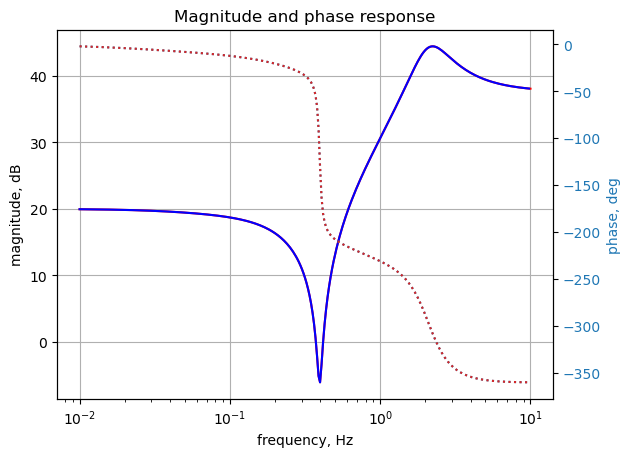

In [40]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-r')    # Bode magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.unwrap(2*np.angle(voltage)/2) *180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

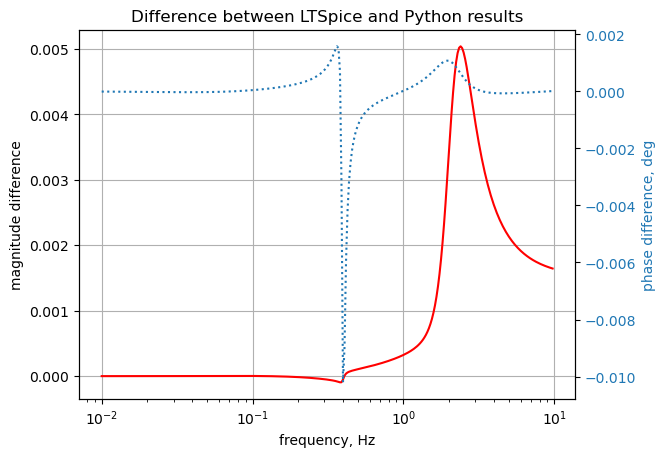

In [41]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude difference')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency[0:-1], np.abs(voltage[0:-1])-10**(mag/20),'-r')    # Bode magnitude plot
#plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[0:-1], np.unwrap(2*np.angle(voltage[0:-1])/2) *180/np.pi - phase,':',color=color)  # Bode phase plot
#plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase difference, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Difference between LTSpice and Python results')
plt.show()

The SymPy and LTSpice results overlay each other. 